# Melting Polar Ice - Assignment 2

Name: Ka Hei Pinky, Chow
U number: 6899518

Q1. Mitrovica et al. (2001) showed how the global footprint of mass loss of glaciated regions could
be combined with measurements of sea level from tide gauges to learn about the mass changes.
For the values of eustatic sea level (or ESL rate) given, calculate the changes in sea level
at the following locations.

In [1]:
pwd

'C:\\Users\\Admin\\Desktop\\Melting Polar Ice\\Assignment2'

In [2]:
"""
Created on Tue Mar 26 12:56:10 2019
@author: Ka Hei Pinky, Chow
"""

'\nCreated on Tue Mar 26 12:56:10 2019\n@author: Ka Hei Pinky, Chow\n'

All library and data are imported.

In [3]:
#####################Question 1#######################
import matplotlib.pyplot as plt
import numpy as np
import time
from emsc3032.lab2 import read_sph, sph_sum
import cartopy.crs as ccrs
import cartopy.feature as cfeature

print("Q1. For the values of eustatic sea level (or ESL rate) given, calculate the changes in sea level \
at the following locations.")
print("=====================================================")

print ("Standard computations ", time.ctime())
input_file_Greenland = "./Greenland.sph"
input_file_E_ANT = "./E_ANT.sph"
input_file_W_ANT = "./W_ANT.sph"

print ("\nReading the spherical harmonic files: ", input_file_Greenland, ", ", input_file_E_ANT, ", ", input_file_W_ANT)

C1, S1 = read_sph(input_file_Greenland)
CE, SE = read_sph(input_file_E_ANT)
CW, SW = read_sph(input_file_W_ANT)


Q1. For the values of eustatic sea level (or ESL rate) given, calculate the changes in sea level at the following locations.
Standard computations  Mon Apr  1 10:44:28 2019

Reading the spherical harmonic files:  ./Greenland.sph ,  ./E_ANT.sph ,  ./W_ANT.sph


Setting up latitude and lontitude for the given locations

In [4]:
#Setting up latitude and lontitude for the given locations
lat = [38.722252, -75.25772, -42.8819, -12.379 ,37.774929, 5.161131]
lon = [-9.139337,	97.81815,	147.32381	, 130.886993, -122.419418, -52.649334]

Location_label = ["Lisbon, Portugal", "McMurdo, Antarctica", "Hobart, TAS, Australia", \
                  "Groote Eylandt, NT, Australia", "San Francisco, CA, USA", "Kourou, French Guiana"]

Printing out the calculated fingerprint values.

In [5]:
#Fingerprint Value
print("\n (1a). Fingerprint\nFingerprint values for contribution of Greenland, East Antarctica and West Antarctica are: ")

print("===========================================")
N = np.zeros((6,3))
print("\t Greenland \t\t East Antarctica \t\t West Antarctica")
for i in range(len(lat)):
    N[i,0] = round(sph_sum(lat[i],lon[i],C1,S1),3)
    N[i,1] = round(sph_sum(lat[i],lon[i],CE,SE),3)
    N[i,2] = round(sph_sum(lat[i],lon[i],CW,SW),3)
    print(Location_label[i], N[i,0], N[i,1], N[i,2])
print("===========================================")



 (1a). Fingerprint
Fingerprint values for contribution of Greenland, East Antarctica and West Antarctica are: 
	 Greenland 		 East Antarctica 		 West Antarctica
Lisbon, Portugal 0.48 1.099 1.126
McMurdo, Antarctica 0.981 -1.818 -0.462
Hobart, TAS, Australia 0.977 0.832 0.993
Groote Eylandt, NT, Australia 1.006 1.07 1.149
San Francisco, CA, USA 0.83 1.066 1.183
Kourou, French Guiana 0.951 1.111 1.139


Setting up a 6 x 5 matrix for the table and print out all sealevel data in a loop.

In [6]:
print("\n (1b). Sea level change\nWhen sea level contribution of Greenland, East Antarctica and West Antarctica are\
[_________] respectively, sea level change in the locations are: (round to three effective digits).\n")

#Developing a matrix for the table
cl = [[1,0,0], [0,1,0], [0,0,1], [-4,+5,+15], [-0.3,+1.6,+2.5]]
print("Remarks: All the sea level values in the first three scenarios are in m, whereas the last two are in mm.")

print("===========================================")

M = np.zeros((6,5))
print("\tGreenland \t East Antarctica \t West Antarctica")
print(cl)
for i in range(len(lat)): #location 
    for m in range(len(cl)):
        greenland = sph_sum(lat[i],lon[i],C1,S1)
        east_antarctica = sph_sum(lat[i],lon[i],CE,SE)
        west_antarctica = sph_sum(lat[i],lon[i],CW,SW)
        M[i,m] = round(greenland*cl[m][0] + east_antarctica*cl[m][1] + west_antarctica*cl[m][2], 3)
    print(Location_label[i], M[i])
    
print("===========================================\n\n")



 (1b). Sea level change
When sea level contribution of Greenland, East Antarctica and West Antarctica are[_________] respectively, sea level change in the locations are: (round to three effective digits).

Remarks: All the sea level values in the first three scenarios are in m, whereas the last two are in mm.
	Greenland 	 East Antarctica 	 West Antarctica
[[1, 0, 0], [0, 1, 0], [0, 0, 1], [-4, 5, 15], [-0.3, 1.6, 2.5]]
Lisbon, Portugal [ 0.48   1.099  1.126 20.472  4.431]
McMurdo, Antarctica [  0.981  -1.818  -0.462 -19.945  -4.358]
Hobart, TAS, Australia [ 0.977  0.832  0.993 15.148  3.521]
Groote Eylandt, NT, Australia [ 1.006  1.07   1.149 18.55   4.281]
San Francisco, CA, USA [ 0.83   1.066  1.183 19.756  4.414]
Kourou, French Guiana [ 0.951  1.111  1.139 18.834  4.34 ]




By plotting the fingerprint values in a map, the results can be visually inspected to see if it is reasonable.

=========Fingerprint Values Check=============


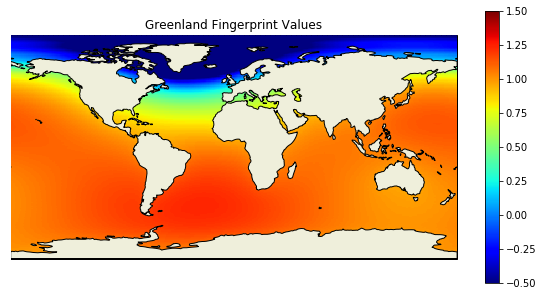

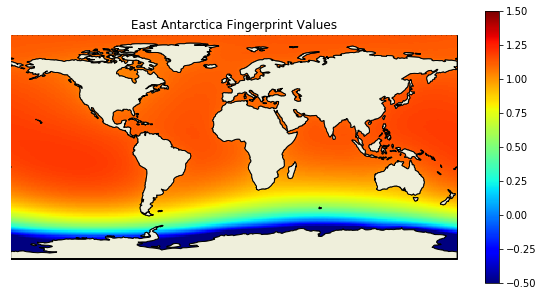

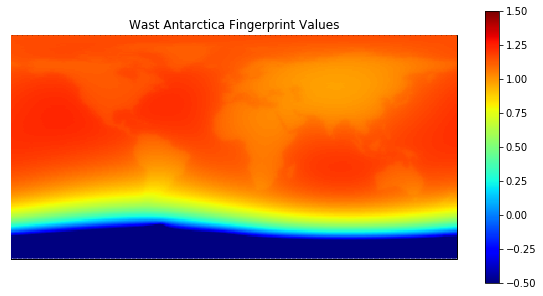

In [7]:
######Checking Fingerprint Values#####
print("=========Fingerprint Values Check=============")
grid_step = 5
lat_plot = np.array(range(-90,90+1,grid_step))
lon_plot = np.array(range(0,360+1,grid_step))

globe_Greenland = sph_sum(lat_plot,lon_plot,C1,S1)
globe_EANT = sph_sum(lat_plot,lon_plot,CE,SE)
globe_WANT = sph_sum(lat_plot,lon_plot,CW,SW)
#Fingerprint Values for Greenland
fig1 = plt.figure(figsize=(10,5))
ax1 = plt.axes(projection=ccrs.PlateCarree())

plt.title('Greenland Fingerprint Values')
meshc1 = ax1.pcolormesh(lon_plot,lat_plot, globe_Greenland,vmin=-0.5,vmax=+1.5,cmap='jet',\
                        zorder=10, facecolor='white')
ax1.add_feature(cfeature.LAND, zorder=100, edgecolor='black')
bar = plt.colorbar(meshc1,orientation='vertical')

ax1.coastlines()

#Fingerprint Values for East Antarctica
fig2 = plt.figure(figsize=(10,5))
ax2 = plt.axes(projection=ccrs.PlateCarree())

plt.title('East Antarctica Fingerprint Values')
meshc2 = ax2.pcolormesh(lon_plot,lat_plot,globe_EANT,vmin=-0.5,vmax=1.5,cmap='jet',\
                        zorder=10,facecolor='white')
ax2.add_feature(cfeature.LAND, zorder=100, edgecolor='black')
bar = plt.colorbar(meshc2,orientation='vertical')

ax2.coastlines()

#Fingerprint Values for East Antarctica
fig3 = plt.figure(figsize=(10,5))
ax3 = plt.axes(projection=ccrs.PlateCarree())

plt.title('West Antarctica Fingerprint Values')
meshc3 = ax3.pcolormesh(lon_plot,lat_plot,globe_WANT,vmin=-0.5,vmax=1.5,cmap='jet',\
                        zorder=10,facecolor='white')
ax3.add_feature(cfeature.LAND, zorder=100, edgecolor='black')
bar = plt.colorbar(meshc3,orientation='vertical')

ax3.coastlines()


Plotting the two scanerios with cartopy.


Plotting the given two scanerios: 
the End of Question 1


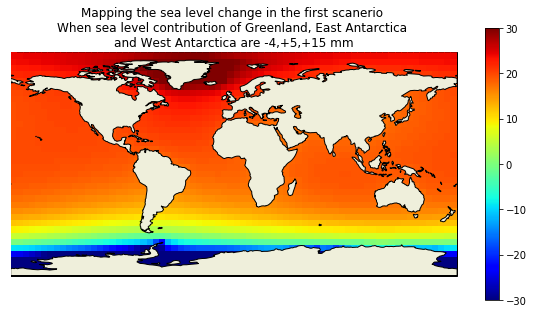

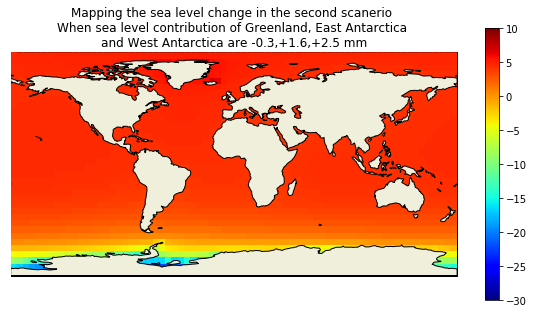

In [8]:
######Plotting the map###########
print("=========================================")
print("\nPlotting the given two scanerios: ")

grid_step = 5
#grid_step = 1
lat_plot = np.array(range(-90,90+1,grid_step))
lon_plot = np.array(range(0,360+1,grid_step))

globe_Greenland = sph_sum(lat_plot,lon_plot,C1,S1)
globe_EANT = sph_sum(lat_plot,lon_plot,CE,SE)
globe_WANT = sph_sum(lat_plot,lon_plot,CW,SW)

#first plot
#When sea level contribution of Greenland, East Antarctica and West Antarctica are -4,+5,+15 mm
globe_SUM_S1 = globe_Greenland*-4 + globe_EANT*5 + globe_WANT*15
fig1 = plt.figure(figsize=(10,5))
ax1 = plt.axes(projection=ccrs.PlateCarree())

plt.title('Mapping the sea level change in the first scanerio \nWhen sea level contribution of \
Greenland, East Antarctica \nand West Antarctica are -4,+5,+15 mm')
mesh1 = ax1.pcolormesh(lon_plot,lat_plot,globe_SUM_S1,vmin=-30,vmax=+30,cmap='jet', \
                       zorder=10, facecolor='white')
bar = plt.colorbar(mesh1,orientation='vertical')
ax1.add_feature(cfeature.LAND, zorder=100, edgecolor='black')
ax1.coastlines()

#second plot
#When sea level contribution of Greenland, East Antarctica and West Antarctica are -0.3,+1.6,+2.5 mm
globe_SUM_S2 = globe_Greenland*-0.3 + globe_EANT*1.6 + globe_WANT*2.5
fig2 = plt.figure(figsize=(10,5))
ax2 = plt.axes(projection=ccrs.PlateCarree())

plt.title('Mapping the sea level change in the second scanerio \nWhen sea level contribution of \
Greenland, East Antarctica \nand West Antarctica are -0.3,+1.6,+2.5 mm')
mesh2 = ax2.pcolormesh(lon_plot,lat_plot,globe_SUM_S2,vmin=-30,vmax=+10, cmap='jet',\
                       zorder=10, facecolor='white')
bar = plt.colorbar(mesh2, orientation='vertical')
ax2.add_feature(cfeature.LAND, zorder=100, edgecolor='black')
ax2.coastlines()

print("the End of Question 1")

Q2: Mitrovica et al (Science, 2001) demonstrated the feasibility of estimating the magnitude of the
contributions of Greenland, Antarctica and mountain glaciers to eustatic sea level from a global distribution of
tide gauges.

Assuming that all sea level changes are caused by only Greenland,
West Antarctica and East Antarctica, use the fingerprint spherical harmonic models of Question 1
and the relative sea level changes at the following sites to
calculate the contributions of each of Greenland, West and East Antarctica.

In [9]:
###########Question 2########################
print("=====================================================")
print("\nQ2: Mitrovica et al (Science, 2001) demonstrated the feasibility of estimating the magnitude of the\
contributions of Greenland, Antarctica and mountain glaciers to eustatic sea level from a global distribution of\
tide gauges. \nAssuming that all sea level changes are caused by only Greenland, \
West Antarctica and East Antarctica, use the fingerprint spherical harmonic models of Question 1 \
and the relative sea level changes at the following sites to\
calculate the contributions of each of Greenland, West and East Antarctica.\n")
print("=====================================================")


Q2: Mitrovica et al (Science, 2001) demonstrated the feasibility of estimating the magnitude of thecontributions of Greenland, Antarctica and mountain glaciers to eustatic sea level from a global distribution oftide gauges. 
Assuming that all sea level changes are caused by only Greenland, West Antarctica and East Antarctica, use the fingerprint spherical harmonic models of Question 1 and the relative sea level changes at the following sites tocalculate the contributions of each of Greenland, West and East Antarctica.



Setting up the new set of locations and printing out the fingerprint values.

In [10]:
lat_2 = [+59.35, +46.51, -10.25, -51.41, -25.38, -49.23, +21.18]
lon_2 = [-149.35, -52.55, +105.41, -57.39, +45.08, +70.11, -157.52]

Location_label_2 = ["Chiswell Island, Alaska", "Capahayden, Canada",  \
                  "Flying Fish Cove, Christmas Island", "Stanley, Faulkland Islands", \
                  "Cap Sainte Marie, Madagascar", "Port aux Francais, Kerguelen", "Honolulu, Hawaii"]

#Fingerprint Values

print("\n (2a). Fingerprint Values at the given location. ")
X = np.zeros((7,3))
print("\t\tGreenland \t\tEast Antarctica \t\tWest Antarctica")
for i in range(len(lat)):
    X[i,0] = round(sph_sum(lat_2[i],lon_2[i],C1,S1),3)
    X[i,1] = round(sph_sum(lat_2[i],lon_2[i],CE,SE),3)
    X[i,2] = round(sph_sum(lat_2[i],lon_2[i],CW,SW),3)
    print(Location_label_2[i], "\n", X[i,0], X[i,1], X[i,2])


 (2a). Fingerprint Values at the given location. 
		Greenland 		East Antarctica 		West Antarctica
Chiswell Island, Alaska 
 0.551 1.081 1.163
Capahayden, Canada 
 0.15 1.104 1.21
Flying Fish Cove, Christmas Island 
 1.048 1.094 1.189
Stanley, Faulkland Islands 
 1.217 0.83 0.484
Cap Sainte Marie, Madagascar 
 1.086 0.959 1.125
Port aux Francais, Kerguelen 
 1.089 0.516 0.962


There are in total three varibles: the contributions of sea level change in Greenland, West Antarctica and East Antarctica. They can be found out with the least square method.

In [11]:
####LEAST SQUARE METHOD####
print("\n (2b). Estimating the contributions of each of Greenland, West and East Antarctica. ")
# y = G*Sg + E*Se + W*Sw
sl = [0.52, 0.37, 0.59, 0.50, 0.56, 0.33, 0.63]
y = [Location_label_2]
n_obs = len(sl) 
n_params = 3 

G=1
E=1
W=1

A = np.zeros((n_obs,n_params))
b = np.zeros((n_obs))
xhat = np.zeros((n_params))

for iter in range(20):
    for i in range(n_obs): 
        A[i,0] = sph_sum(lat_2[i],lon_2[i],C1,S1)
        A[i,1] = sph_sum(lat_2[i],lon_2[i],CE,SE)
        A[i,2] = sph_sum(lat_2[i],lon_2[i],CW,SW)
        b[i] = sl[i] - (G*A[i,0] + E*A[i,1] + W*A[i,2])

    At = np.transpose(A)
    AtA = np.dot(At,A)
    VCV = np.linalg.inv(AtA) 
    Atb = np.dot(At,b)
    xhat = np.dot(VCV,Atb)     
  
    G = G + xhat[0]
    E = E + xhat[1]
    W = W + xhat[2]        
            
print("Final parameter estimates:   G= ", round(G,3))
print("Final parameter estimates:   E= ", round(E,3))
print("Final Parameter estimates:   W= ", round(W,3)) 
    


 (2b). Estimating the contributions of each of Greenland, West and East Antarctica. 
Final parameter estimates:   G=  0.179
Final parameter estimates:   E=  0.399
Final Parameter estimates:   W=  -0.039


In [12]:
#End of Q2
print("============End of code=============")

============End of code=============
